steps:
1. load sentinel data


In [1]:
import matplotlib.pyplot as plt
from greensight.utils import DIR_DATA
import geopandas as gpd
import pandas as pd
import json

In [2]:
sentinel_data_path = DIR_DATA / "sentinel_data"
assert sentinel_data_path.is_dir()

In [3]:
# load lookup table
lookup_path = DIR_DATA / "id_lookup/id_lookup.json"

with open(lookup_path, "r") as in_file:
    D_lookup = json.load(in_file)

In [ ]:
D_out = {}
for year_path in list(sentinel_data_path.iterdir())[1:]:
    if year_path.stem.split("_")[1] != "2021":
        group_ids =set([file.stem.split("__")[1][:21] for file in year_path.iterdir()])
        groups = [[file for file in year_path.iterdir() if "mean" in file.stem and gid in file.stem] for gid in group_ids]
        df_group = [[pd.read_csv(file) for file in group] for group in groups]
        df_group = [[df.sort_values(by="LAD_CD") for df in group] for group in df_group]
        df_group = [[df.set_index("LAD_CD") for df in group] for group in df_group]
        df_group = [pd.concat(group, axis=1, ignore_index=False) for group in df_group]
        df_group = [df.drop(columns=["system:index", ".geo"]) for df in df_group]
        df_combined = pd.concat(df_group, axis=0)
        df_combined.insert(0, "greenbelt", df_combined.index.map(lambda x: D_lookup[x]))
        D_out[year_path.stem.split("_")[1]] = df_combined

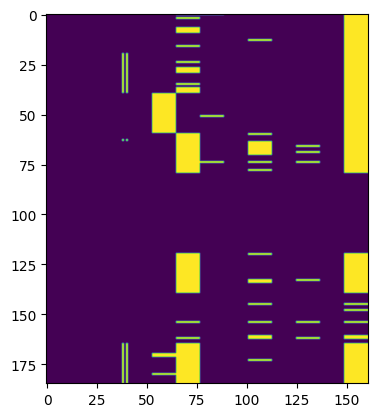

In [6]:
plt.imshow(df_combined.isna())

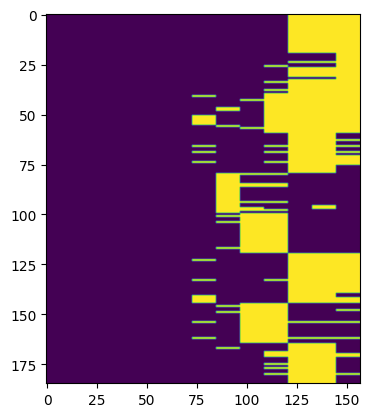

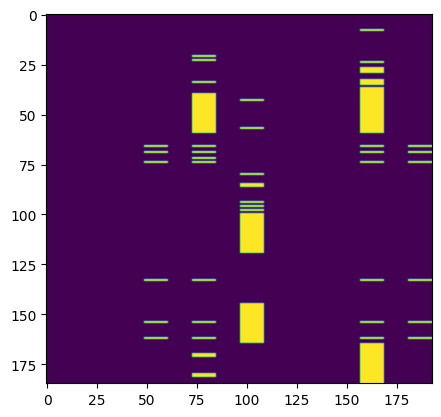

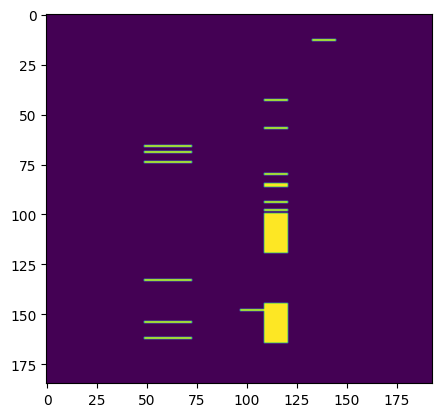

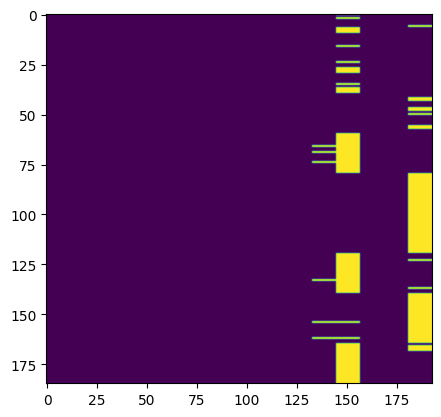

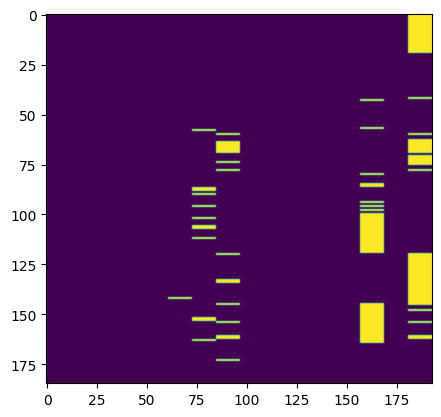

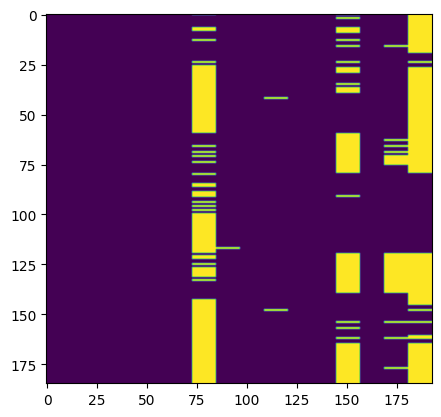

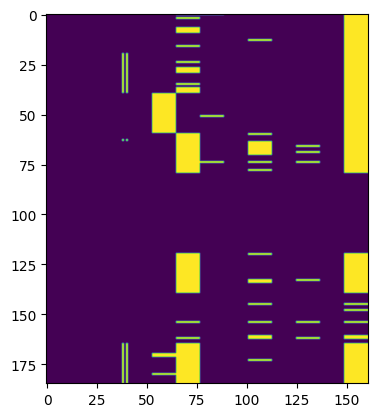

In [9]:
for df in D_out.values():
    plt.figure()
    plt.imshow(df.isna())

In [22]:
a = list(D_out.values())[-2]
b = list(D_out.values())[-1]

In [23]:
b.columns.values

array(['greenbelt', '0_VHAsc', '0_VHDes', '0_VVAsc', '0_VVDes', '1_VHAsc',
       '1_VHDes', '1_VVAsc', '1_VVDes', '2_VHAsc', '2_VHDes', '2_VVAsc',
       '2_VVDes', '3_VHAsc', '3_VHDes', '3_VVAsc', '3_VVDes', '4_VHAsc',
       '4_VHDes', '4_VVAsc', '4_VVDes', '5_VHAsc', '5_VHDes', '5_VVAsc',
       '5_VVDes', '6_VHAsc', '6_VHDes', '6_VVAsc', '6_VVDes', '7_VHAsc',
       '7_VHDes', '7_VVAsc', '7_VVDes', '8_VHAsc', '8_VHDes', '8_VVAsc',
       '8_VVDes', '9_VHAsc', '9_VHDes', '9_VVAsc', '9_VVDes', '0_B1',
       '0_B11', '0_B12', '0_B2', '0_B3', '0_B4', '0_B5', '0_B6', '0_B7',
       '0_B8', '0_B8A', '0_B9', '2_B1', '2_B11', '2_B12', '2_B2', '2_B3',
       '2_B4', '2_B5', '2_B6', '2_B7', '2_B8', '2_B8A', '2_B9', '3_B1',
       '3_B11', '3_B12', '3_B2', '3_B3', '3_B4', '3_B5', '3_B6', '3_B7',
       '3_B8', '3_B8A', '3_B9', '4_B1', '4_B11', '4_B12', '4_B2', '4_B3',
       '4_B4', '4_B5', '4_B6', '4_B7', '4_B8', '4_B8A', '4_B9', '5_B1',
       '5_B11', '5_B12', '5_B2', '5_B3', '5_B4', '5_

In [24]:
print(len(a.columns))
print(len(b.columns))

193
161


In [25]:
c = [col for col in a.columns if col not in b.columns]
print(len(c))
c

32


['10_VHAsc',
 '10_VHDes',
 '10_VVAsc',
 '10_VVDes',
 '11_VHAsc',
 '11_VHDes',
 '11_VVAsc',
 '11_VVDes',
 '10_B1',
 '10_B11',
 '10_B12',
 '10_B2',
 '10_B3',
 '10_B4',
 '10_B5',
 '10_B6',
 '10_B7',
 '10_B8',
 '10_B8A',
 '10_B9',
 '11_B1',
 '11_B11',
 '11_B12',
 '11_B2',
 '11_B3',
 '11_B4',
 '11_B5',
 '11_B6',
 '11_B7',
 '11_B8',
 '11_B8A',
 '11_B9']

In [20]:
[col for col in b.columns if col not in a.columns]

[]

In [27]:
cols = [df.columns for df in D_out.values()]
    

In [40]:
for i, col in enumerate(cols):
    if len(col) == len(cols[1]):
        if not (col == cols[1]).all():
            print(i, col.shape, "\t", cols[1].shape)
    else:
        print(col.shape, "\t", cols[0].shape)


(157,) 	 (157,)
4 (193,) 	 (193,)
5 (193,) 	 (193,)
(161,) 	 (157,)


In [41]:
cols[4]

Index(['greenbelt', '0_VHAsc', '0_VHDes', '0_VVAsc', '0_VVDes', '10_VHAsc',
       '10_VHDes', '10_VVAsc', '10_VVDes', '11_VHAsc',
       ...
       '4_B12', '4_B2', '4_B3', '4_B4', '4_B5', '4_B6', '4_B7', '4_B8',
       '4_B8A', '4_B9'],
      dtype='object', length=193)

In [42]:
cols[1]

Index(['greenbelt', '0_VHAsc', '0_VHDes', '0_VVAsc', '0_VVDes', '10_VHAsc',
       '10_VHDes', '10_VVAsc', '10_VVDes', '11_VHAsc',
       ...
       '9_B12', '9_B2', '9_B3', '9_B4', '9_B5', '9_B6', '9_B7', '9_B8',
       '9_B8A', '9_B9'],
      dtype='object', length=193)

In [43]:
[i for i in cols[4] if i not in cols[1]]

[]

In [44]:
[i for i in cols[1] if i not in cols[4]]


[]

In [46]:
list(D_out.values())[4][cols[1]]

,greenbelt,0_VHAsc,0_VHDes,0_VVAsc,0_VVDes,10_VHAsc,10_VHDes,10_VVAsc,10_VVDes,11_VHAsc,...,9_B12,9_B2,9_B3,9_B4,9_B5,9_B6,9_B7,9_B8,9_B8A,9_B9
LAD_CD,,,,,,,,,,,,,,,,,,,,,
E06000021,Stoke-on-Trent,-16.735460,-17.148324,-10.150743,-10.851981,-16.524813,-16.506839,-10.073101,-10.302017,-17.146992,...,1024.868017,345.065965,597.843383,467.769771,1065.547306,2408.076877,2802.436293,3035.938803,3091.303200,3108.180519
E06000047,Tyne and Wear,-17.962593,-17.681581,-10.940921,-10.582624,-17.340897,-16.788938,-10.664307,-10.010979,-17.873371,...,946.405468,227.994613,509.152709,422.687028,941.960640,2186.091389,2536.261232,2760.938582,2777.865699,2805.257285
E06000049,Merseyside and Greater Manchester,-17.409886,-17.753383,-10.045529,-10.683637,-17.247221,-17.234362,-10.471419,-10.599342,-17.915014,...,960.836403,353.292812,601.194154,443.881037,1015.224806,2450.750031,2883.489447,3089.413793,3133.869187,3154.023054
E06000057,Tyne and Wear,-18.723858,-18.330315,-11.307069,-10.925403,-18.328249,-17.936098,-11.411095,-10.976176,-18.934354,...,986.813379,252.271103,539.458975,456.541757,990.776509,2251.979495,2611.983830,2842.536334,2851.279271,2898.708745
E07000038,South and West Yorkshire,-18.099691,-18.109058,-11.207428,-11.184051,-17.615733,-17.099547,-10.974628,-10.439139,-18.041619,...,979.230394,296.418099,570.218792,442.922614,998.895738,2357.303814,2732.361889,2944.859303,2983.428547,3054.244591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E07000237,Birmingham,-17.421114,-17.614715,-10.563818,-10.783937,-17.525316,-16.512070,-10.798148,-9.957997,-17.348187,...,1038.344128,381.721059,612.193985,498.848135,1029.793915,2208.214657,2578.882286,2764.464165,2790.193054,2832.674412
E07000238,Birmingham,-17.990094,-18.345924,-10.578856,-11.151493,-17.966002,-17.021491,-10.956828,-10.440962,-17.949958,...,1189.383103,421.565141,675.488921,589.339910,1123.464285,2376.540969,2760.717172,2950.794530,2976.202600,3029.052661
E07000239,Birmingham,-17.572453,-17.974598,-10.354566,-10.954929,-17.399486,-16.812230,-10.486874,-10.251020,-17.529271,...,1016.303569,329.144089,582.120219,481.133776,1005.023425,2211.796779,2553.926889,2742.903822,2781.642453,2813.812478


In [47]:
list(D_out.values())[1]


,greenbelt,0_VHAsc,0_VHDes,0_VVAsc,0_VVDes,10_VHAsc,10_VHDes,10_VVAsc,10_VVDes,11_VHAsc,...,9_B12,9_B2,9_B3,9_B4,9_B5,9_B6,9_B7,9_B8,9_B8A,9_B9
LAD_CD,,,,,,,,,,,,,,,,,,,,,
E06000021,Stoke-on-Trent,-15.857171,-25.336361,-9.615789,-20.718936,-16.996908,-17.140467,-10.664401,-10.898405,-16.277898,...,1052.565840,343.800648,587.418955,409.787707,996.382823,2522.524399,3011.470509,3260.198169,3289.248624,3335.408746
E06000047,Tyne and Wear,-17.132377,-21.275377,-10.463401,-15.401158,-17.327145,-17.089618,-10.699368,-10.232327,-17.659861,...,927.847165,363.009549,600.618514,507.512786,1005.959177,2069.772825,2367.552834,2605.653961,2625.335848,2689.072795
E06000049,Merseyside and Greater Manchester,-16.156615,-16.227084,-9.412968,-9.646162,-17.457630,-17.552919,-10.662223,-10.757662,-16.774969,...,1033.879363,364.368262,600.823896,417.668459,979.580214,2508.096128,3009.409213,3226.941050,3251.860938,3314.833956
E06000057,Tyne and Wear,-17.879999,-17.363214,-10.752570,-10.367848,-18.290227,-18.006168,-11.369234,-10.999101,-18.494440,...,1009.566396,320.822609,591.254111,495.487311,1007.346773,2253.203889,2615.554165,2803.262310,2862.541023,2897.216702
E07000038,South and West Yorkshire,-16.828257,-16.568169,-10.358001,-10.233566,-17.879142,-17.828655,-11.251898,-11.043896,-17.351377,...,1110.871490,366.240678,610.518543,498.944280,990.031916,2194.395826,2548.511245,2757.021290,2799.779088,2929.591568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E07000237,Birmingham,-16.970598,-16.819596,-9.949374,-9.993566,-17.529215,-17.949833,-10.692308,-11.058259,-16.951934,...,1175.969538,401.688979,641.460469,538.130147,1056.275865,2239.451177,2604.362908,2804.564988,2824.385707,2886.724919
E07000238,Birmingham,-16.996533,-18.664081,-9.897942,-12.297935,-18.202259,-18.604314,-10.712509,-11.234022,-17.359665,...,1261.215074,400.388320,640.442106,601.306823,1080.604981,2147.071430,2496.663237,2713.630556,2718.052255,2792.731436
E07000239,Birmingham,-16.666111,-22.441952,-9.820893,-16.919088,-17.447652,-17.880984,-10.393753,-10.941249,-16.860611,...,1097.536640,328.009705,570.839247,488.996179,987.677387,2168.709070,2541.903432,2781.428940,2777.078105,2844.865521
